# Capstone Project 

# Introduction:

In this project, we will try to find the best possible location (a neighborhood) for a restaurant in the city of North York, in Ontario, Canada.

The way we will find the best possible neighborhood to open a new restaurant in is by searching the neighborhood with the minimum number of alredy existing restaurants, we will know how many rastaurants are currently open by searching in the Foursquare API.

This information could be very useful to any person who is looking to open a new restaurant in the North York Borough. This notebook could be useful to see which neighborhood in North York is the one with the greatest number of currently open restaurants and consider it as another possible location due to it's characteristics.

# Data description

For convinience reasons the data we will be using is a part of the one used in the last lab of the course. That data consisted on a dataframe with five columns, which were:

**Postal code**: Postal code of the area.

**Borough**: Borough to which the neighborhood(s) belongs.

**Neighborhood**: Name of the neighborhood(s), it can be more than one because the dataset was originally created based on the postal code.

**Latitude**: geographical latitude of the neighborhood.

**Longitude**:geographical longitude of the neighborhood.

I will add the .csv file to the repository so you cand find it eassier.

# Methodology 

In [1]:
from bs4 import BeautifulSoup
import requests
import pandas as pd
import numpy as np

Let´s import our data and save it into a pandas dataframe:

In [2]:
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share the notebook.
client_369b14b46cb84bc595983859954f30c6 = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='gW6dMfP5P-quPLPYk5DBt1bnoGSGjWZUmN3e2A2YxBDh',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_369b14b46cb84bc595983859954f30c6.get_object(Bucket='datascience-donotdelete-pr-37hdo3tmpis3rg',Key='North_York.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body)
df_data_1.head()


,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493


Now we are going to rename the dataframe to north_york, and we will use it untill the end of the Lab.

In [3]:
north_york = df_data_1
north_york.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude
0,M2H,North York,Hillcrest Village,43.803762,-79.363452
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556
2,M2K,North York,Bayview Village,43.786947,-79.385975
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493


Please notice that the dataframe is alredy pre processed, so we can easily start using it to accomplish the goal of the lab: finding the Neighborhood in the North York borough. So we will start building our URL to connect to the Foursquare API.

In [4]:
CLIENT_ID = 'AHLWBMBQMBIVJ0JUKDMAVWZ0DFAL4G5J0HANUBQE5CDJJF1N' # my Foursquare ID
CLIENT_SECRET = 'ZHGFCRIP4OEF53Y4NLJK21PHLOESA5ZCFO0QTGCJ5OZBZQKI' # my Foursquare Secret
VERSION = '20180604'
LIMIT = 50
search_query = 'Restaurant'
radius = 1500

In [5]:
l_latitude=north_york['Latitude']
l_longitude=north_york['Longitude']

In [6]:
from pandas.io.json import json_normalize
numbers = []
for i in range (0, 24):
    url = 'https://api.foursquare.com/v2/venues/search?client_id={}&client_secret={}&ll={},{}&v={}&query={}&radius={}&limit={}'.format(CLIENT_ID, CLIENT_SECRET, l_latitude[i], l_longitude[i], VERSION, search_query, radius, LIMIT)
    results = requests.get(url).json()
    
    
    venues = results['response']['venues']
    # tranform venues into a dataframe
    dataframe = json_normalize(venues)
    
    
    numbers.append(dataframe.shape[0])
    ##results

In [7]:
print(numbers)

[13, 12, 7, 8, 34, 29, 8, 7, 6, 9, 14, 6, 20, 8, 1, 7, 10, 8, 20, 15, 24, 11, 6, 3]


In [8]:
north_york['Number']=numbers

In [9]:
north_york.head()

,Postal code,Borough,Neighborhood,Latitude,Longitude,Number
0,M2H,North York,Hillcrest Village,43.803762,-79.363452,13
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,12
2,M2K,North York,Bayview Village,43.786947,-79.385975,7
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714,8
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,34


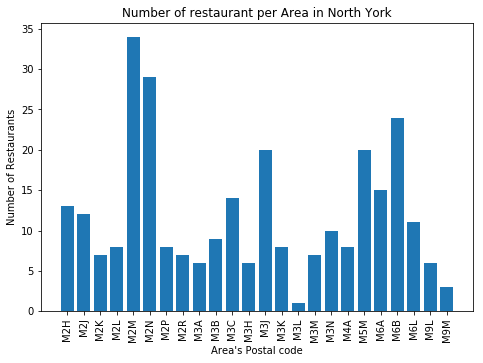

In [10]:
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(north_york['Postal code'],north_york['Number'])
plt.xticks(rotation=90)
plt.title('Number of restaurant per Area in North York')
plt.ylabel('Number of Restaurants')
plt.xlabel('Area\'s Postal code')
plt.show()

Let's see the whole Data Frame:

In [11]:
north_york.head(24)

,Postal code,Borough,Neighborhood,Latitude,Longitude,Number
0,M2H,North York,Hillcrest Village,43.803762,-79.363452,13
1,M2J,North York,"Fairview, Henry Farm, Oriole",43.778517,-79.346556,12
2,M2K,North York,Bayview Village,43.786947,-79.385975,7
3,M2L,North York,"York Mills, Silver Hills",43.757490,-79.374714,8
4,M2M,North York,"Willowdale, Newtonbrook",43.789053,-79.408493,34
5,M2N,North York,Willowdale,43.770120,-79.408493,29
6,M2P,North York,York Mills West,43.752758,-79.400049,8
7,M2R,North York,Willowdale,43.782736,-79.442259,7
8,M3A,North York,Parkwoods,43.753259,-79.329656,6
9,M3B,North York,Don Mills,43.745906,-79.352188,9


In [12]:
maxim=north_york['Number'].max()
minim=north_york['Number'].min()
print('Maximum number: ',maxim)
print('Minimum number: ',minim)

Maximum number:  34
Minimum number:  1


# Results

So now we know the number of alredy existing restaurant on each area based on the postal code of the North York Borrough. And by watching the bar graph, we know that the area with the minimum number of restaurants is the one with the M3L postal code, wich is in the Downsview neighborhood with latitude: 43.739015 and longitude -79.506944 with only one alredy existing restaurant.

Please notice that since we said at the introduction of this notebook, another interesting approachto find the best possible location to open a new restaurant could be finding the area with the biggest number of alredy existing restaurants, beacuause it can be considered as the most commercial area, so we did that too: we foud that there is an area with 34 existing restaurants, and is the one with the postal code M2M, with 2 different neighborhoods: Willowdale and Newtonbrook.

# Discussion

One problem with this exercise was that the original data set we used was grouped by postal code, so in the case of a very big Neighborhood there are more than one postal codes for the same neighborhood.

Other problem with this data set is that there are some postal codes for more than one neighborhood so it's not the most accurate way to find the best possible location.

# Conclusions

We found two interesting locations to open a new restaurant, depending on if we want to open it in the area with the most or least ammount of alredy existing restaurant on it.

If we want to have the least competitors in the area, we should open a new restaurant in the Downsview neighborhood, with only one opened restaurant.

On the other hand, if we want to open it on the "most commercial area", we should open it on Willowdale or Newtonbrook, and we will have 34 competitors in there.